In [1]:
import pandas as pd
import scipy.io
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as dtc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
D = scipy.io.loadmat('/content/drive/My Drive/ML(PG)_assignment_1/dataset_2.mat')
print(D)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Sep 12 18:52:19 2020', '__version__': '1.0', '__globals__': [], 'samples': array([[-3.74203958, -3.04465737],
       [ 4.60871196,  7.01765941],
       [ 5.31135551,  0.97011991],
       ...,
       [ 5.17666258,  5.10746383],
       [ 6.66563706,  5.465137  ],
       [ 7.86690019,  4.4964122 ]]), 'labels': array([[0, 3, 2, ..., 3, 3, 3]])}


In [4]:
samplesarr2 = D['samples']
data2 = pd.DataFrame(samplesarr2)
labels2 = D['labels'].reshape(-1)
data2['labels'] = labels2
print(data2)

              0         1  labels
0     -3.742040 -3.044657       0
1      4.608712  7.017659       3
2      5.311356  0.970120       2
3      4.881857  5.295445       3
4     -4.517404 -1.755663       0
...         ...       ...     ...
19995  5.052006  1.276917       2
19996  4.035034  6.306404       3
19997  5.176663  5.107464       3
19998  6.665637  5.465137       3
19999  7.866900  4.496412       3

[20000 rows x 3 columns]


# **Answer to Q2**

In [5]:
data2.head(10)

,0,1,labels
0,-3.742040,-3.044657,0
1,4.608712,7.017659,3
2,5.311356,0.970120,2
3,4.881857,5.295445,3
4,-4.517404,-1.755663,0
5,7.995706,6.125495,3
6,7.353455,6.725916,3
7,-2.850123,6.649119,1
8,5.993990,5.836847,3
9,-5.263660,-2.624980,0


In [6]:
def Train_Test_Split(df):
  #shuffle_df = df.sample(frac=1)
  # Define a size for your train set 
  train_size = int(0.7 * len(df))

  # Split your dataset 
  train_set = df[:train_size]
  test_set = df[train_size:]
  return train_set,test_set

In [7]:
X_train,X_test=Train_Test_Split(data2.iloc[:,:2])

In [8]:
y_train,y_test=Train_Test_Split(data2.iloc[:,2:])

In [9]:
cls=dtc(max_depth=3,class_weight='balanced')

In [10]:
cls.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_pred=cls.predict(X_test)

In [12]:
y_test1=np.array(y_test)

In [13]:
y_test1 = (y_test1).reshape(-1)
y_test1

array([3, 1, 3, ..., 3, 3, 3])

In [14]:
df_confusion = pd.crosstab(y_test1, y_pred)
df_confusion

col_0,0,1,2,3
row_0,,,,
0,1455,0,0,0
1,0,1486,0,0
2,0,0,1444,90
3,0,0,112,1413


In [15]:
t_val=0
f_val=0
for i in range(4):
  for j in range(4):
    if i==j:
      t_val+=df_confusion[i][j]
    else:
      f_val+=df_confusion[i][j]


In [16]:
accuracy=t_val/(f_val+t_val)

In [17]:
accuracy

0.9663333333333334

# **Answer to Q2(a)**

In [31]:
acc_array1=[]
def Grid_Search():
  for i in range(2,17):
    cls=dtc(max_depth=i,class_weight='balanced')
    cls= cls.fit(X_train,y_train)
    y_pred=cls.predict(X_test)
    y_test2=np.array(y_test)
    y_test2 = (y_test2).reshape(-1)
    df_confusion2 = pd.crosstab(y_test2, y_pred)
    t_val1=0
    f_val1=0
    for i in range(4):
      for j in range(4):
        if i==j:
          t_val1+=df_confusion2[i][j]
        else:
          f_val1+=df_confusion2[i][j]
    accuracy1=t_val1/(f_val1+t_val1)
    acc_array1.append(accuracy1)
  return acc_array1

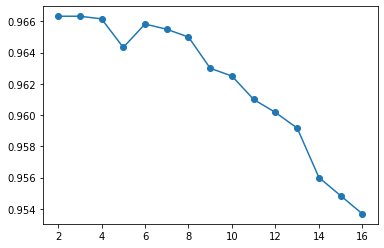

In [19]:
acc_array1 = Grid_Search()
plt.plot(np.arange(2,17), acc_array1, marker = 'o')
plt.show()

In [20]:
#For Depth vs Validation_accuracy table
table1=np.vstack((np.arange(2,17),acc_array1)).T
table1_df=pd.DataFrame(table1,columns=["Depth","Validation_Accuracy"])
table1_df

,Depth,Validation_Accuracy
0,2.0,0.966333
1,3.0,0.966333
2,4.0,0.966167
3,5.0,0.964333
4,6.0,0.965833
5,7.0,0.965500
6,8.0,0.965000
7,9.0,0.963000
8,10.0,0.962500
9,11.0,0.961000


# **Answer to Q2(b)**

In [21]:
acc_array2=[]
def Grid_Search2():
  for i in range(2,17):
    cls=dtc(max_depth=i,class_weight='balanced')
    cls= cls.fit(X_train,y_train)
    y_pred2=cls.predict(X_train)
    y_train2=np.array(y_train)
    y_train2 = (y_train2).reshape(-1)
    df_confusion3 = pd.crosstab(y_train2, y_pred2)
    t_val2=0
    f_val2=0
    for i in range(4):
      for j in range(4):
        if i==j:
          t_val2+=df_confusion3[i][j]
        else:
          f_val2+=df_confusion3[i][j]
    accuracy2=t_val2/(f_val2+t_val2)
    acc_array2.append(accuracy2)
  return acc_array2

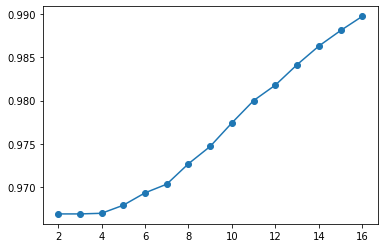

In [22]:
acc_array2 = Grid_Search2()
plt.plot(np.arange(2,17), acc_array2, marker = 'o')
plt.show()

In [23]:
train_acc = pd.DataFrame(acc_array2)
train_acc
table2_df = table1_df
table2_df['Training_accuracy'] = train_acc
table2_df

,Depth,Validation_Accuracy,Training_accuracy
0,2.0,0.966333,0.966929
1,3.0,0.966333,0.966929
2,4.0,0.966167,0.967000
3,5.0,0.964333,0.967929
4,6.0,0.965833,0.969357
5,7.0,0.965500,0.970357
6,8.0,0.965000,0.972714
7,9.0,0.963000,0.974714
8,10.0,0.962500,0.977429
9,11.0,0.961000,0.980000


# **Answer to Q2(c)**

In [24]:
from sklearn import metrics
acc_array3=[]
def Grid_Search3():
  for i in range(2,17):
    cls=dtc(max_depth=i,class_weight='balanced')
    cls= cls.fit(X_train,y_train)
    y_pred=cls.predict(X_test)
    y_test2=np.array(y_test)
    y_test2 = (y_test2).reshape(-1)
    accuracy3=metrics.accuracy_score(y_test,y_pred)
    acc_array3.append(accuracy3)
  return acc_array3

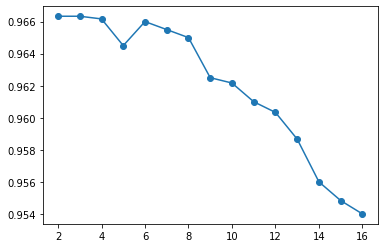

In [25]:
acc_array3 = Grid_Search3()
plt.plot(np.arange(2,17), acc_array3, marker = 'o')
plt.show()

In [26]:
acc_array1

[0.9663333333333334,
 0.9663333333333334,
 0.9661666666666666,
 0.9643333333333334,
 0.9658333333333333,
 0.9655,
 0.965,
 0.963,
 0.9625,
 0.961,
 0.9601666666666666,
 0.9591666666666666,
 0.956,
 0.9548333333333333,
 0.9536666666666667]

In [32]:
valid_acc = pd.DataFrame(acc_array3)
table3_df = table1_df.iloc[:,:2]
table3_df['Validation_Accuracy(metrics)'] = valid_acc
acc_array1  = Grid_Search()
diff_arr = np.subtract(acc_array1, acc_array3)
diff = pd.DataFrame(diff_arr)
table3_df['Difference'] = diff
table3_df

,Depth,Validation_Accuracy,Validation_Accuracy(metrics),Difference
0,2.0,0.966333,0.966333,0.000000
1,3.0,0.966333,0.966333,0.000000
2,4.0,0.966167,0.966167,0.000000
3,5.0,0.964333,0.964500,0.000000
4,6.0,0.965833,0.966000,0.000000
5,7.0,0.965500,0.965500,-0.000167
6,8.0,0.965000,0.965000,0.000000
7,9.0,0.963000,0.962500,0.000167
8,10.0,0.962500,0.962167,0.000000
9,11.0,0.961000,0.961000,0.000500
